In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('train2.csv')

In [13]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [15]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [19]:
print('A qucik view of the head of the data')
df.head()

A qucik view of the head of the data


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [21]:
print("A quick view of the tail of the data")
df.tail()

A quick view of the tail of the data


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,51.0,36.6,27,36.935484,51,29,42.172414,60,30,41.403226,66,36,51.533333,85,41,53.887097,80,41,58.433333,90,48,60.532258,83,49,64.338710,90,43,55.931034,75,40,48.532258,60,31,45.150000,69,18,30.919355,42,148,5853,107.69,28.8,377,49.127397,17,1,0,0,16,0,0,0,NaN,NaN,NaN,NaN,29.154684,75756


In [23]:
print("the sample of 10 datas")
df.sample(10)

the sample of 10 datas


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
38870,4,State_6,Residential,Multifamily_Uncategorized,189933.0,2004.0,NaN,42.7,4,28.596774,58,9,31.625000,56,13,37.661290,66,31,52.333333,77,49,64.000000,86,55,72.450000,89,63,76.145161,91,61,74.516129,90,52,69.733333,92,42,59.629032,77,22,45.300000,69,24,40.516129,65,1128,4875,53.79,50.0,377,54.501370,66,24,7,0,75,4,0,0,1.0,1.0,1.0,NaN,103.893927,38870
41132,4,State_6,Residential,Multifamily_Uncategorized,67305.0,1912.0,55.0,42.7,4,28.596774,58,9,31.625000,56,13,37.661290,66,31,52.333333,77,49,64.000000,86,55,72.450000,89,63,76.145161,91,61,74.516129,90,52,69.733333,92,42,59.629032,77,22,45.300000,69,24,40.516129,65,1128,4875,53.79,50.0,377,54.501370,66,24,7,0,75,4,0,0,1.0,1.0,1.0,NaN,76.714286,41132
49397,5,State_6,Residential,Multifamily_Uncategorized,100310.0,1929.0,92.0,42.7,8,29.854839,56,2,23.946429,43,12,38.096774,62,32,54.250000,80,48,68.516129,88,50,71.183333,90,64,78.790323,96,63,78.967742,95,56,74.450000,97,35,58.048387,78,32,52.783333,74,34,50.774194,72,1581,4460,40.97,49.1,463,56.835616,63,34,9,0,106,12,0,0,310.0,310.0,13.0,110.0,56.916514,49397
704,2,State_1,Commercial,Office_Uncategorized,446640.0,1991.0,88.0,2.4,27,48.951613,69,33,51.655172,78,34,52.822581,74,37,58.850000,90,45,64.612903,92,49,67.900000,103,53,70.467742,99,52,71.806452,100,49,68.466667,97,43,63.983871,100,35,55.283333,79,28,47.919355,65,791,2439,19.27,0.0,0,60.247268,3,0,0,0,113,35,1,0,1.0,1.0,1.0,88.0,74.787424,704
53950,6,State_6,Commercial,Public_Assembly_Other,67025.0,1935.0,NaN,3.4,11,34.451613,59,-1,37.706897,61,26,48.870968,79,26,53.333333,82,43,62.790323,92,52,72.250000,88,63,78.677419,96,61,79.177419,96,54,71.800000,91,38,58.758065,85,34,49.766667,72,17,38.338710,60,1489,4252,42.17,36.0,101,57.215847,40,11,2,1,96,17,0,0,1.0,1.0,1.0,NaN,162.754098,53950
20086,2,State_6,Residential,Multifamily_Uncategorized,795215.0,2000.0,NaN,42.7,13,37.322581,62,20,40.879310,62,25,50.935484,78,38,54.766667,88,49,65.096774,89,51,70.983333,94,61,78.758065,100,61,76.693548,91,53,68.800000,91,38,58.048387,78,31,43.866667,66,28,41.467742,62,1277,3978,38.51,9.6,10,57.366120,22,5,0,0,72,17,0,0,1.0,1.0,1.0,99.0,71.489782,20086
61607,6,State_6,Commercial,Warehouse_Nonrefrigerated,134565.0,1958.0,57.0,42.7,11,34.451613,59,-1,37.706897,61,26,48.870968,79,26,53.333333,82,43,62.790323,92,52,72.250000,88,63,78.677419,96,61,79.177419,96,54,71.800000,91,38,58.758065,85,34,49.766667,72,17,38.338710,60,1489,4252,42.17,36.0,101,57.215847,40,11,2,1,96,17,0,0,NaN,NaN,NaN,131.0,60.933060,61607
66281,3,State_8,Commercial,Education_Other_classroom,292229.0,2009.0,25.0,18.3,4,32.903226,67,12,32.160714,56,23,38.451613,60,24,51.600000,89,33,61.467742,92,47,71.633333,92,57,78.419355,96,51,71.741935,89,40,64.466667,93,28,56.806452,86,17,41.683333,71,12,34.177419,69,1081,5331,48.96,19.4,25,53.082192,105,24,4,0,86,16,0,0,NaN,NaN,NaN,NaN,104.601198,66281
30648,3,State_6,Residential,Multifamily_Uncategorized,109500.0,1910.0,NaN,42.7,11,35.080645,61,17,33.910714,55,27,40.145161,59,33,52.983333,82,42,

In [27]:
df.shape

(75757, 64)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Factor,75757.0,4.367755,1.471441,1.000000,3.000000,5.000000,6.000000,6.000000e+00
floor_area,75757.0,165983.865858,246875.790940,943.000000,62379.000000,91367.000000,166000.000000,6.385382e+06
year_built,73920.0,1952.306764,37.053619,0.000000,1927.000000,1951.000000,1977.000000,2.015000e+03
energy_star_rating,49048.0,61.048605,28.663683,0.000000,40.000000,67.000000,85.000000,1.000000e+02
ELEVATION,75757.0,39.506323,60.656596,-6.400000,11.900000,25.000000,42.700000,1.924500e+03
january_min_temp,75757.0,11.432343,9.381027,-19.000000,6.000000,11.000000,13.000000,4.900000e+01
january_avg_temp,75757.0,34.310468,6.996108,10.806452,29.827586,34.451613,37.322581,6.475806e+01
january_max_temp,75757.0,59.054952,5.355458,42.000000,56.000000,59.000000,62.000000,9.100000e+01
february_min_temp,75757.0,11.720567,12.577272,-13.000000,2.000000,9.000000,20.000000,4.800000e+01
february_avg_temp,75757.0,35.526837,8.866697,13.250000,31.625000,34.107143,40.879310,6.510714e+01


In [33]:
df.isnull().mean()

Year_Factor                  0.000000
State_Factor                 0.000000
building_class               0.000000
facility_type                0.000000
floor_area                   0.000000
year_built                   0.024249
energy_star_rating           0.352561
ELEVATION                    0.000000
january_min_temp             0.000000
january_avg_temp             0.000000
january_max_temp             0.000000
february_min_temp            0.000000
february_avg_temp            0.000000
february_max_temp            0.000000
march_min_temp               0.000000
march_avg_temp               0.000000
march_max_temp               0.000000
april_min_temp               0.000000
april_avg_temp               0.000000
april_max_temp               0.000000
may_min_temp                 0.000000
may_avg_temp                 0.000000
may_max_temp                 0.000000
june_min_temp                0.000000
june_avg_temp                0.000000
june_max_temp                0.000000
july_min_tem

In [35]:
X = df[['max_wind_speed','energy_star_rating']]
y = df[['site_eui']]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape,X_test.shape

((60605, 2), (15152, 2))

In [41]:
X_train.isnull().mean()

max_wind_speed        0.543305
energy_star_rating    0.353436
dtype: float64

In [43]:
#mean_wind = X_train['max_wind_speed'].mean()
#median_wind = X_train['max_wind_speed'].median()

#mean_rating = X_train['energy_star_rating'].mean()
#median_rating = X_train['energy_star_rating'].median()

In [47]:
X_train.describe()

,max_wind_speed,energy_star_rating
count,27678.000000,39185.000000
mean,4.201196,61.021615
std,6.472308,28.679626
min,1.000000,1.000000
25%,1.000000,40.000000
50%,1.000000,67.000000
75%,1.000000,85.000000
max,23.300000,100.000000


In [61]:
X_train['wind_max'] = X_train['max_wind_speed'].fillna(24)
X_train['wind_min'] = X_train['max_wind_speed'].fillna(-1)

X_train['max_rating'] = X_train['energy_star_rating'].fillna(999)
X_train['min_rating'] = X_train['energy_star_rating'].fillna(-1)

In [63]:
X_train.sample(5)

,max_wind_speed,energy_star_rating,wind_max,wind_min,max_rating,min_rating
17434,NaN,NaN,24.0,-1.0,999.0,-1.0
51677,NaN,12.0,24.0,-1.0,12.0,12.0
33552,1.0,NaN,1.0,1.0,999.0,-1.0
36972,1.0,NaN,1.0,1.0,999.0,-1.0
60322,NaN,49.0,24.0,-1.0,49.0,49.0


In [65]:
print('teh variance os the wind speed is',X_train['max_wind_speed'].var())
print('the variance of max wind speed is',X_train['wind_max'].var())
print("The variance of the min wind speed is",X_train['wind_min'].var())

teh variance os the wind speed is 41.89076816185031
the variance of max wind speed is 116.39558128175715
The variance of the min wind speed is 25.843416858080268


In [67]:
print('the variance of the energy star rating is',X_train['energy_star_rating'].var())
print('the variance of the max energy star rating is',X_train['max_rating'].var())
print('the variance of the min energy star rating is',X_train['min_rating'].var())

the variance of the energy star rating is 822.5209445627191
the variance of the max energy star rating is 201586.9719119956
the variance of the min energy star rating is 1410.861817657648


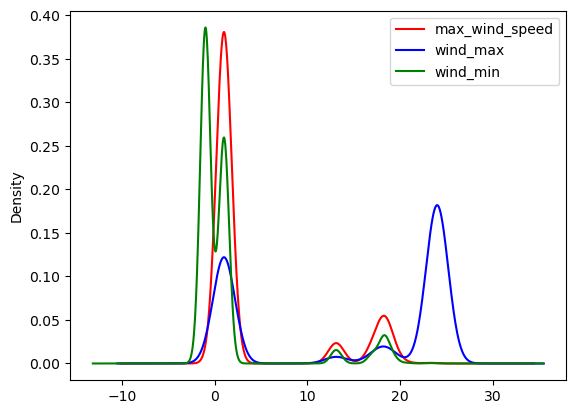

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['max_wind_speed'].plot(kind='kde',ax=ax,color='red')
X_train['wind_max'].plot(kind='kde',ax=ax,color='blue')
X_train['wind_min'].plot(kind='kde',ax=ax,color='Green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

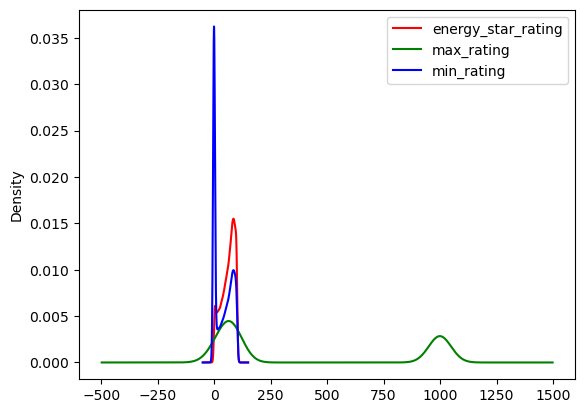

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['energy_star_rating'].plot(kind='kde',ax=ax,color='red')
X_train['max_rating'].plot(kind='kde',ax=ax,color='green')
X_train['min_rating'].plot(kind='kde',ax=ax,color='blue')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

In [83]:
X_train.isnull().mean()

max_wind_speed        0.543305
energy_star_rating    0.353436
wind_max              0.000000
wind_min              0.000000
max_rating            0.000000
min_rating            0.000000
dtype: float64